In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import log_parser
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
PATH = "E:\\webdata_datasets\\all_good_seq_parser\\log-sequential-regex.txt"

In [2]:
df, df2 = log_parser.parse_log_file(PATH)
df["time"] = df["time"].dt.total_seconds()
df2["time"] = df2["time"].dt.total_seconds()

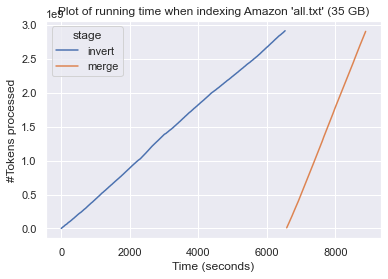

In [15]:
ax = sns.lineplot(data=df, x="time", y="numTokens", hue="stage")
ax.set(xlabel="Time (seconds)", ylabel="#Tokens processed")
plt.title("Plot of running time when indexing Amazon 'all.txt' (35 GB)")
plt.show()

In [16]:
ax.get_figure().savefig("runtime.pdf")

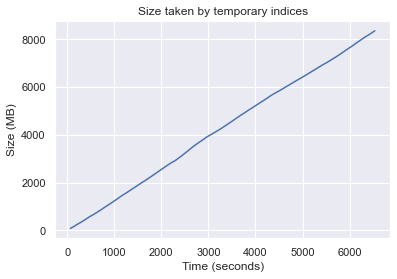

In [14]:
df2["index_size"] = df2["total_index_size"]/(1000 * 1000)

ax2 = sns.lineplot(data=df2, x="time", y="index_size")
ax2.set(xlabel="Time (seconds)", ylabel="Size (MB)")
plt.title("Size taken by temporary indices")
plt.show()

In [13]:
ax2.get_figure().savefig("diskusage.pdf")